In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [124]:
data_pd = pd.read_csv('data.txt',header = None, names = ['Population','Profit'])
data_pd.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [161]:
data = np.loadtxt('data.txt', delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size

In [126]:
data_pd.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [158]:
def plotData(x, y):
    
    fig = plt.figure()
    
    plt.plot(x, y,'go', ms=10, mec='k')
    plt.ylabel('Profi')
    plt.xlabel('Population of City')

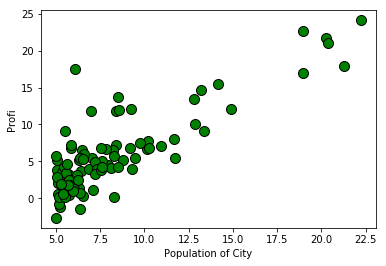

In [162]:
plotData(X,y)

In [163]:
X = np.stack([np.ones(m), X], axis=1) # EXECUTE THIS ONLY ONCE
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

In [164]:
def computeCost(X, y, theta):
    m = y.size
    
    J = 0
    h = np.dot(X,theta)
    l = [i**2 for i in h-y]
    J = 0.5*(1/m)*sum(l)
    
    return J

In [165]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    
    for i in range(num_iters):
        h = np.dot(X,theta)
        theta = theta-alpha*(1.0/m)*np.dot(X.T,h-y)
        
    return theta

In [166]:
theta = np.zeros(2)
theta = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent:',theta)

Theta found by gradient descent: [-3.63029144  1.16636235]


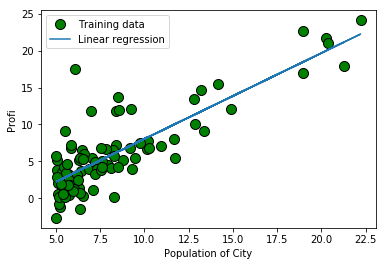

In [168]:
plotData(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Linear regression']);

In [167]:
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of ',predict1*10000)

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of ',predict2*10000)

pred = np.array([[predict1*10000],[predict2*10000]])

For population = 35,000, we predict a profit of  4519.7678677017675
For population = 70,000, we predict a profit of  45342.45012944712


# Using Scikit-Learn

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [141]:
X_new = data_pd.iloc[:, :-1].values
y_new = data_pd.iloc[:, 1].values

In [142]:
xTrain, xTest, yTrain, yTest = train_test_split(X_new, y_new, test_size = 1/3, random_state = 0)


In [143]:
linearRegressor = LinearRegression()

In [144]:
linearRegressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
yPrediction = linearRegressor.predict(xTest)

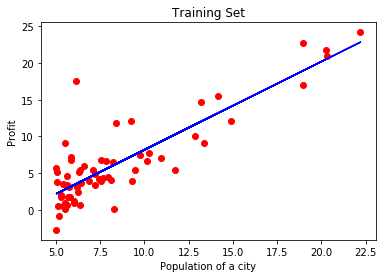

In [146]:
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plt.title('Training Set')
plt.xlabel('Population of a city')
plt.ylabel('Profit')
plt.show()

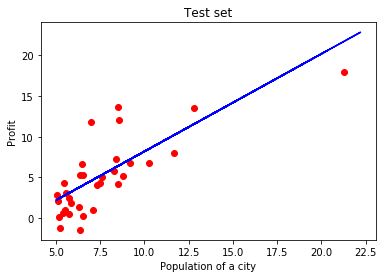

In [147]:
plt.scatter(xTest, yTest, color = 'red')
plt.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plt.title('Test set')
plt.xlabel('Population of a city')
plt.ylabel('Profit')
plt.show()

In [148]:
#To retrieve the intercept:
print('Intercept=',linearRegressor.intercept_)

#For retrieving the slope:
print('Coefficient=',linearRegressor.coef_)

Intercept= -3.8029376406412485
Coefficient= [1.19878234]


In [149]:
X_given = np.array([[3.5],[7]])
y_pred2 = linearRegressor.predict(X_given)*10000

In [169]:
df = pd.DataFrame({'Using Scikit_Learn': y_pred2.flatten(), 'Self Implemented': pred.flatten()})
df.rename(index={0:'35,000',1:'70,000'},inplace=True)
df

,Using Scikit_Learn,Self Implemented
"35,000",3928.005332,4519.767868
"70,000",45885.387070,45342.450129
